### This notebook looks at the impact of systematically deleting SC ... to the OUTER networks i.e., from ntwx A to ntwx B, C, etc

#### In this notebook (based on the convo with "Dave"), I try to isolate the different FC NTwx, but strcuturally. 
##### I will then run whobpyt on these structurally isolated ntwx to see how it affects FC, potentially shedding some light on how FC ntwx emerge. 

##### 'structurally isolate' means virtual lesions that make the regions of the a given network (eg: DMN) only have connections to itself.   
##### Essentially, you set the conncetions of the DMN regions/parcels with other ntwx to 0 in the SC mtx.  

##### All of the above will be first attempted for a single subject.  
##### This NB uses a resolution of 200 Schaefer parcellations.  

In [1]:
# Importage
import warnings
warnings.filterwarnings('ignore')

# os stuff
import os
import sys

import nibabel as nib
from nilearn.plotting import plot_surf, plot_surf_stat_map, plot_roi, plot_anat, plot_surf_roi
from nilearn.image import index_img

import seaborn as sns

# whobpyt stuff
import whobpyt
from whobpyt.data.dataload import dataloader
# from whobpyt.models.jansen_rit import RNNJANSEN
from whobpyt.models.wong_wang import RNNRWW
from whobpyt.datatypes.modelparameters import ParamsModel
from whobpyt.optimization.modelfitting import Model_fitting

# array and pd stuff
import numpy as np
import pandas as pd

# viz stuff
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

In [3]:
import seaborn as sns
import scipy.stats as stats

In [97]:
import pickle

In [5]:
parcs = np.arange(0,200,1)

mask = np.tril_indices(len(parcs), -1)

# Labels
_label_file =  '/external/rprshnas01/kcni/hharita/Code/whobpyt/scratch/Schaefer200_7_Ntwx_labels.txt'

f = open(_label_file, "r")
q = f.read()
q = q.rsplit('\n')
# del q[-32:]
labels = q.copy()
labels = np.array(labels)
labels = labels[parcs]


In [6]:
import re

In [7]:
folder_one_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II'
folder_two_path = SCs_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Improved_WWD_HCP_model_runs/All_Subs_SC_Wts/Davide_HCP_Data_Matrix'

# Get the list of files in each folder
folder_one_files = os.listdir(folder_one_path)
folder_two_files = os.listdir(folder_two_path)

# Extract the numbers from the filenames in folder_one
folder_one_numbers = []
for file in folder_one_files:
    match = re.search(r'\d+', file)
    if match:
        folder_one_numbers.append(int(match.group()))

# Extract the numbers from the filenames in folder_two
folder_two_numbers = []
for file in folder_two_files:
    match = re.search(r'\d+', file)
    if match:
        folder_two_numbers.append(int(match.group()))

# Find the common numbers between the two folders
common_numbers = list(set(folder_one_numbers) & set(folder_two_numbers))

sub_list = common_numbers.copy()

sub_list.sort()

sub_list = sub_list[0:200]

In [8]:
pconn_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/Shrey_SS_parcellated_Func_Conns_II/'

In [9]:
def emp_fc(sub_id):
    pconn1LR = pconn_path + '{0}_rfMRI_REST1_RL_Schaefer200_cifti_parcellated.ptseries.nii'.format(sub_id)
    pconn_img1LR = nib.load(pconn1LR)
    pconn_dat1LR = pconn_img1LR.get_data()
    pconn_dat1LR = pconn_dat1LR/1
    return pconn_dat1LR

In [10]:
%%time

all_subs_emp_fc = []
for i in range(len(sub_list)):
    ss_emp_fc = emp_fc(sub_list[i])
    all_subs_emp_fc.append(ss_emp_fc)

CPU times: user 59.1 s, sys: 535 ms, total: 59.7 s
Wall time: 1min 5s


In [81]:
sample_ts = all_subs_emp_fc[0].T


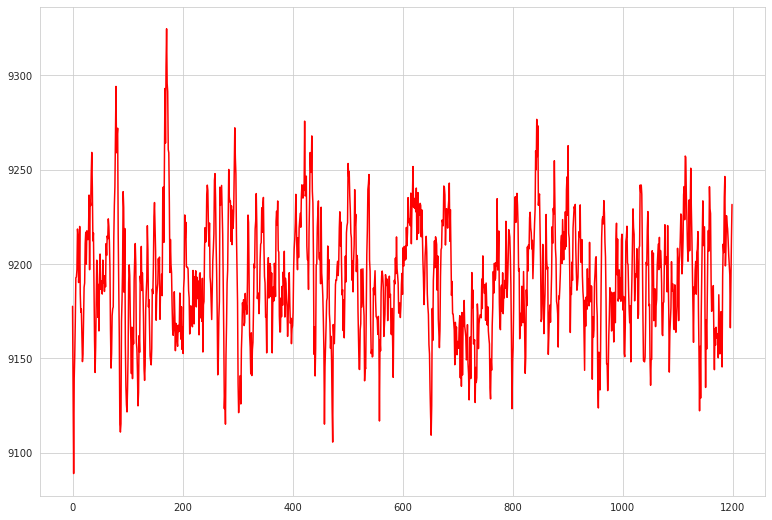

In [91]:
fig, ax = plt.subplots(figsize=(13,9))
# plt.plot([all_subs_emp_fc[0][400:600]][0][0])
plt.plot(sample_ts[10],color='r')
plt.show()

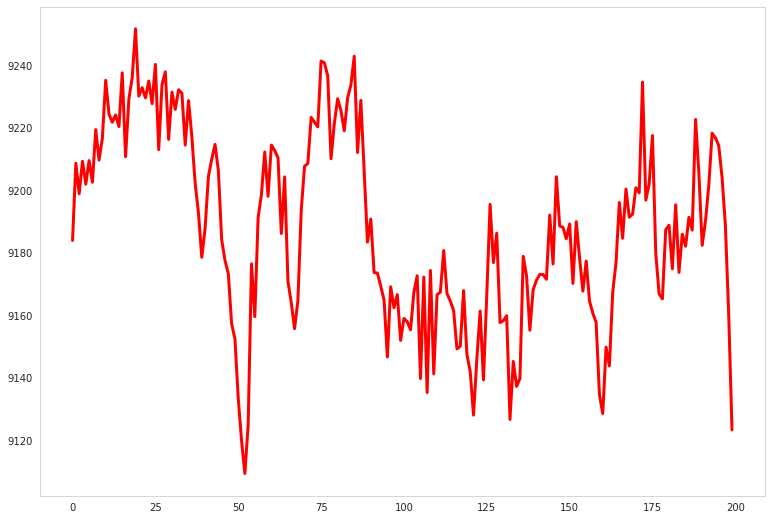

In [95]:
fig, ax = plt.subplots(figsize=(13,9))
# plt.plot([all_subs_emp_fc[0][400:600]][0][0])
plt.plot(sample_ts[10][600:800],color='r',linewidth=3)
# plt.plot(sample_ts[10][400:600],color='b',linewidth=3)
plt.grid(False)
plt.show()

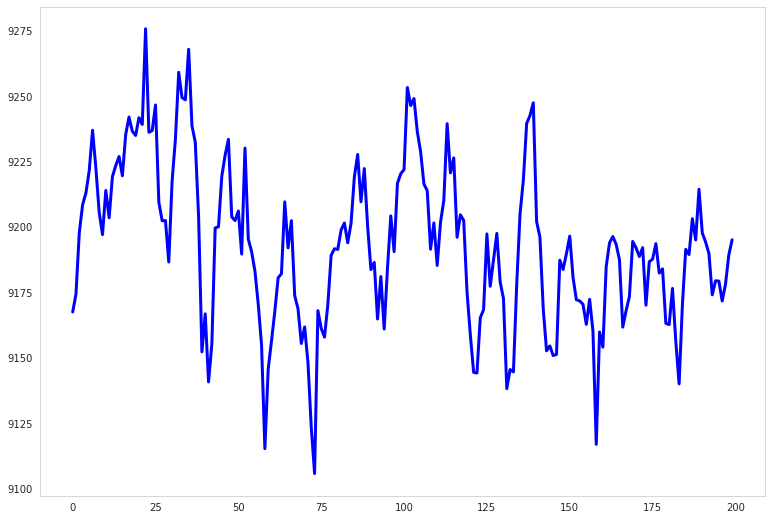

In [96]:
fig, ax = plt.subplots(figsize=(13,9))
# plt.plot([all_subs_emp_fc[0][400:600]][0][0])
# plt.plot(sample_ts[10][600:800],color='r',linewidth=3)
plt.plot(sample_ts[10][400:600],color='b',linewidth=3)
plt.grid(False)
plt.show()

In [11]:
%%time
all_subs_emp_fc_mat = []
for i in range(200):
    all_subs_emp_fc_mat.append(np.corrcoef(all_subs_emp_fc[i].T))

CPU times: user 1.42 s, sys: 46.1 ms, total: 1.46 s
Wall time: 1.46 s


In [12]:
og_whobpyt_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/200_subjects_WhoBPyT_run'
lesion_whobpyt_path = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/Data/Shrey/WhoBPyT/Ntwx_Lesion_WhoBPyT_200_subs'

###  Takes 45 mins ... strap in!

In [13]:
%%time

all_subs_og_whobpyt = []

all_subs_vis_lesion = []
# all_subs_vis_lesion_cc_cut = []

all_subs_sommot_lesion = []
# all_subs_sommot_lesion_cc_cut = []

all_subs_dorsattn_lesion = []
# all_subs_dorsattn_lesion_cc_cut = []

all_subs_ventattn_lesion = []
# all_subs_ventattn_lesion_cc_cut = []

all_subs_limbic_lesion = []
# all_subs_limbic_lesion_cc_cut = []

all_subs_fpn_lesion = []
# all_subs_fpn_lesion_cc_cut = []

all_subs_dmn_lesion = []
# all_subs_dmn_lesion_cc_cut = []

for i in range(len(sub_list)):
    
    sub_id = sub_list[i]
    
    ss_og_whobpyt = np.loadtxt(og_whobpyt_path + '/{0}_whobypt_fc_mtx.txt'.format(sub_id))
    all_subs_og_whobpyt.append(ss_og_whobpyt)
    
    ss_vis_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_vis_lesion_fc_con_mat.txt'.format(sub_id))
#     ss_vis_lesion_cc_cut = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_vis_lesion_cc_cut_fc_con_mat.txt'.format(sub_id))
    all_subs_vis_lesion.append(ss_vis_lesion)
#     all_subs_vis_lesion_cc_cut.append(ss_vis_lesion_cc_cut)
    

    ss_sommot_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_sommot_lesion_fc_con_mat.txt'.format(sub_id))
#     ss_sommot_lesion_cc_cut = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_sommot_lesion_cc_cut_fc_con_mat.txt'.format(sub_id))
    all_subs_sommot_lesion.append(ss_sommot_lesion)
#     all_subs_sommot_lesion_cc_cut.append(ss_sommot_lesion_cc_cut)

    ss_dorsattn_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_dorsattn_lesion_fc_con_mat.txt'.format(sub_id))
#     ss_dorsattn_lesion_cc_cut = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_dorsattn_lesion_cc_cut_fc_con_mat.txt'.format(sub_id))
    all_subs_dorsattn_lesion.append(ss_dorsattn_lesion)
#     all_subs_dorsattn_lesion_cc_cut.append(ss_dorsattn_lesion_cc_cut)
    

    ss_ventattn_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_ventattn_lesion_fc_con_mat.txt'.format(sub_id))
#     ss_ventattn_lesion_cc_cut = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_ventattn_lesion_cc_cut_fc_con_mat.txt'.format(sub_id))
    all_subs_ventattn_lesion.append(ss_ventattn_lesion)
#     all_subs_ventattn_lesion_cc_cut.append(ss_ventattn_lesion_cc_cut)

    
    ss_limbic_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_limbic_lesion_fc_con_mat.txt'.format(sub_id))
#     ss_limbic_lesion_cc_cut = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_limbic_lesion_cc_cut_fc_con_mat.txt'.format(sub_id))
    all_subs_limbic_lesion.append(ss_limbic_lesion)
#     all_subs_limbic_lesion_cc_cut.append(ss_limbic_lesion_cc_cut)

    
    ss_fpn_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_fpn_lesion_fc_con_mat.txt'.format(sub_id))
#     ss_fpn_lesion_cc_cut = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_fpn_lesion_cc_cut_fc_con_mat.txt'.format(sub_id))
    all_subs_fpn_lesion.append(ss_fpn_lesion)
#     all_subs_fpn_lesion_cc_cut.append(ss_fpn_lesion_cc_cut)

    
    ss_dmn_lesion = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_dmn_lesion_fc_con_mat.txt'.format(sub_id))
#     ss_dmn_lesion_cc_cut = np.loadtxt(lesion_whobpyt_path + '/Subj_{0}_dmn_lesion_cc_cut_fc_con_mat.txt'.format(sub_id))
    all_subs_dmn_lesion.append(ss_dmn_lesion)
#     all_subs_dmn_lesion_cc_cut.append(ss_dmn_lesion_cc_cut)

CPU times: user 1min 23s, sys: 1.69 s, total: 1min 25s
Wall time: 2min 16s


In [14]:
all_subs_lesion_ntwx = [all_subs_vis_lesion,all_subs_sommot_lesion,
                        all_subs_dorsattn_lesion,all_subs_ventattn_lesion,
                        all_subs_limbic_lesion,all_subs_fpn_lesion,
                        all_subs_dmn_lesion]

In [15]:
# for now deal with avg fc of DMN lesion only (across all ntwx) ...
# This is OUTER connectivity ... i.e., the average ntwx conn to other ntwx (so Vis to SomMot, DorsAttn, ..., DMN etc)

# all_subs_og_whobpyt
# all_subs_dmn_lesion

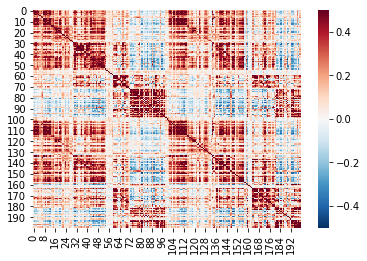

In [16]:
sns.heatmap(all_subs_emp_fc_mat[99], cmap='RdBu_r',center=0,vmax=0.5)

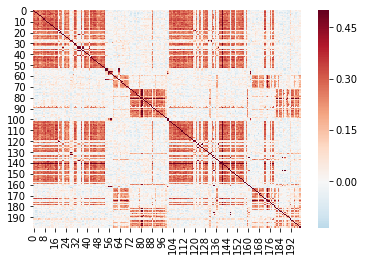

In [17]:
sns.heatmap(all_subs_og_whobpyt[99], cmap='RdBu_r',center=0,vmax=0.5)

In [18]:
from numpy.polynomial.polynomial import polyfit

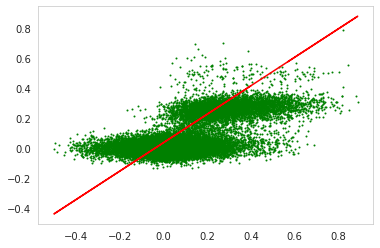

In [19]:
rww_test = all_subs_og_whobpyt[99][mask].flatten()

rww_test2 = all_subs_emp_fc_mat[99][mask].flatten()

m, b = np.polyfit(rww_test, rww_test2, 1)

sns.set_style('whitegrid')
fig,ax = plt.subplots()
plt.scatter(rww_test2, rww_test, color='green',s=1)
plt.plot(rww_test2, m*rww_test2 + b, color='red')
plt.grid(visible=False)

plt.show()

In [20]:
corrs_list = []
for i in range(200):
    corrs_list.append(np.corrcoef(all_subs_emp_fc_mat[i][mask], all_subs_og_whobpyt[i][mask])[0][1])

In [21]:
# corrs_list

In [22]:
ntwx_labels_idxs = [
[0,14,100,115],
[14,30,115,134],
[30,43,134,147],
[43,54,147,158],
[54,60,158,164],
[60,73,164,181],
[73,100,181,200]]

In [23]:
# vis --> (0,14,100,115)
# sommot --> (14,30,115,134)
# dorsattn --> (30,43,134,147)
# ventattn --> (43,54,147,158)
# limbic --> (54,60,158,164)
# fpn --> (60,73,164,181)
# dmn --> (73,100,181,200)

In [24]:
Ntwx_labels = ['Vis', 'SomMot', 'DorsAttn', 'VentAttn', 'Limbic', 'FPN', 'DMN']

#### divide by 2

In [25]:
def outer_ntwx_only_fc(fc, sub, num):
    
    a, b, c, d = ntwx_labels_idxs[num]
    
    lh_ntwx_to_lh_vis = fc[sub][a:b, 0:14]
    lh_ntwx_to_rh_vis = fc[sub][a:b, 100:115]
    
    lh_ntwx_to_lh_sommot = fc[sub][a:b, 14:30]
    lh_ntwx_to_rh_sommot = fc[sub][a:b, 115:134]
    
    lh_ntwx_to_lh_dorsattn = fc[sub][a:b, 30:43]
    lh_ntwx_to_rh_dorsattn = fc[sub][a:b, 134:147]
    
    lh_ntwx_to_lh_ventattn = fc[sub][a:b, 43:54]
    lh_ntwx_to_rh_ventattn = fc[sub][a:b, 147:158]
    
    lh_ntwx_to_lh_limbic = fc[sub][a:b, 54:60]
    lh_ntwx_to_rh_limbic = fc[sub][a:b, 158:164]
    
    lh_ntwx_to_lh_fpn = fc[sub][a:b, 60:73]
    lh_ntwx_to_rh_fpn = fc[sub][a:b, 164:181]
    
    lh_ntwx_to_lh_dmn = fc[sub][a:b, 73:100]
    lh_ntwx_to_rh_dmn = fc[sub][a:b, 181:200]
    
    # ---------------------------------------------
    
    rh_ntwx_to_lh_vis = fc[sub][c:d, 0:14]
    rh_ntwx_to_rh_vis = fc[sub][c:d, 100:115]
    
    rh_ntwx_to_lh_sommot = fc[sub][c:d, 14:30]
    rh_ntwx_to_rh_sommot = fc[sub][c:d, 115:134]
    
    rh_ntwx_to_lh_dorsattn = fc[sub][c:d, 30:43]
    rh_ntwx_to_rh_dorsattn = fc[sub][c:d, 134:147]
    
    rh_ntwx_to_lh_ventattn = fc[sub][c:d, 43:54]
    rh_ntwx_to_rh_ventattn = fc[sub][c:d, 147:158]
    
    rh_ntwx_to_lh_limbic = fc[sub][c:d, 54:60]
    rh_ntwx_to_rh_limbic = fc[sub][c:d, 158:164]
    
    rh_ntwx_to_lh_fpn = fc[sub][c:d, 60:73]
    rh_ntwx_to_rh_fpn = fc[sub][c:d, 164:181]
    
    rh_ntwx_to_lh_dmn = fc[sub][c:d, 73:100]
    rh_ntwx_to_rh_dmn = fc[sub][c:d, 181:200]
        
    mean_ntwx_to_vis_fc = ((np.mean(lh_ntwx_to_lh_vis) + np.mean(rh_ntwx_to_rh_vis))/2 + (np.mean(lh_ntwx_to_rh_vis) + np.mean(rh_ntwx_to_lh_vis))/2)
    mean_ntwx_to_sommot_fc = ((np.mean(lh_ntwx_to_lh_sommot) + np.mean(rh_ntwx_to_rh_sommot))/2 + (np.mean(lh_ntwx_to_rh_sommot) + np.mean(rh_ntwx_to_lh_sommot))/2)
    mean_ntwx_to_dorsattn_fc = ((np.mean(lh_ntwx_to_lh_dorsattn) + np.mean(rh_ntwx_to_rh_dorsattn))/2 + (np.mean(lh_ntwx_to_rh_dorsattn) + np.mean(rh_ntwx_to_lh_dorsattn))/2)
    mean_ntwx_to_ventattn_fc = ((np.mean(lh_ntwx_to_lh_ventattn) + np.mean(rh_ntwx_to_rh_ventattn))/2 + (np.mean(lh_ntwx_to_rh_ventattn) + np.mean(rh_ntwx_to_lh_ventattn))/2)
    mean_ntwx_to_limbic_fc = ((np.mean(lh_ntwx_to_lh_limbic) + np.mean(rh_ntwx_to_rh_limbic))/2 + (np.mean(lh_ntwx_to_rh_limbic) + np.mean(rh_ntwx_to_lh_limbic))/2)
    mean_ntwx_to_fpn_fc = ((np.mean(lh_ntwx_to_lh_fpn) + np.mean(rh_ntwx_to_rh_fpn))/2 + (np.mean(lh_ntwx_to_rh_fpn) + np.mean(rh_ntwx_to_lh_fpn))/2)
    mean_ntwx_to_dmn_fc = ((np.mean(lh_ntwx_to_lh_dmn) + np.mean(rh_ntwx_to_rh_dmn))/2 + (np.mean(lh_ntwx_to_rh_dmn) + np.mean(rh_ntwx_to_lh_dmn))/2)
    
    
    return mean_ntwx_to_vis_fc, mean_ntwx_to_sommot_fc, mean_ntwx_to_dorsattn_fc, mean_ntwx_to_ventattn_fc, mean_ntwx_to_limbic_fc, mean_ntwx_to_fpn_fc, mean_ntwx_to_dmn_fc
    


### original WhoBPyT

In [26]:
%%time

all_subs_vis_to_other_ntwx = []
all_subs_sommot_to_other_ntwx = []
all_subs_dorsattn_to_other_ntwx = []
all_subs_ventattn_to_other_ntwx = []
all_subs_limbic_to_other_ntwx = []
all_subs_fpn_to_other_ntwx = []
all_subs_dmn_to_other_ntwx = []

for i in range(200):
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,0)
    all_subs_vis_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,1)
    all_subs_sommot_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,2)
    all_subs_dorsattn_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,3)
    all_subs_ventattn_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,4)
    all_subs_limbic_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,5)
    all_subs_fpn_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 
    
    vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(all_subs_og_whobpyt,i,6)
    all_subs_dmn_to_other_ntwx.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
    del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

CPU times: user 790 ms, sys: 7.25 ms, total: 797 ms
Wall time: 779 ms


In [27]:
og_whobpyt_vis_to_other_ntwx = all_subs_vis_to_other_ntwx.copy()
og_whobpyt_sommot_to_other_ntwx = all_subs_sommot_to_other_ntwx.copy()
og_whobpyt_dorsattn_to_other_ntwx = all_subs_dorsattn_to_other_ntwx.copy()
og_whobpyt_ventattn_to_other_ntwx = all_subs_ventattn_to_other_ntwx.copy()
og_whobpyt_limbic_to_other_ntwx = all_subs_limbic_to_other_ntwx.copy()
og_whobpyt_fpn_to_other_ntwx = all_subs_fpn_to_other_ntwx.copy()
og_whobpyt_dmn_to_other_ntwx = all_subs_dmn_to_other_ntwx.copy()

In [28]:
# og_whobpyt_vis_to_other_ntwx_std = np.std(all_subs_vis_to_other_ntwx,axis=0)
# og_whobpyt_sommot_to_other_ntwx_std = np.std(all_subs_sommot_to_other_ntwx,axis=0)
# og_whobpyt_dorsattn_to_other_ntwx_std = np.std(all_subs_dorsattn_to_other_ntwx,axis=0)
# og_whobpyt_ventattn_to_other_ntwx_std = np.std(all_subs_ventattn_to_other_ntwx,axis=0)
# og_whobpyt_limbic_to_other_ntwx_std = np.std(all_subs_limbic_to_other_ntwx,axis=0)
# og_whobpyt_fpn_to_other_ntwx_std = np.std(all_subs_fpn_to_other_ntwx,axis=0)
# og_whobpyt_dmn_to_other_ntwx_std = np.std(all_subs_dmn_to_other_ntwx,axis=0)

In [29]:
# Across all 200 subs
og_whobpyt_outer_to_other_ntwx  = [og_whobpyt_vis_to_other_ntwx,og_whobpyt_sommot_to_other_ntwx,
                                   og_whobpyt_dorsattn_to_other_ntwx,og_whobpyt_ventattn_to_other_ntwx,
                                   og_whobpyt_limbic_to_other_ntwx,og_whobpyt_fpn_to_other_ntwx,
                                   og_whobpyt_dmn_to_other_ntwx]

In [30]:
# og_whobpyt_outer_to_other_ntwx_std = [og_whobpyt_vis_to_other_ntwx_std,og_whobpyt_sommot_to_other_ntwx_std,
#                                       og_whobpyt_dorsattn_to_other_ntwx_std,og_whobpyt_ventattn_to_other_ntwx_std,
#                                       og_whobpyt_limbic_to_other_ntwx_std,og_whobpyt_fpn_to_other_ntwx_std,
#                                       og_whobpyt_dmn_to_other_ntwx_std]

### Lesion WhoBPyT

In [31]:
def get_outer_ntwx_fc_all_subs(fc):
    
    all_subs_vis_to_other_ntwx_lesions = []
    all_subs_sommot_to_other_ntwx_lesions = []
    all_subs_dorsattn_to_other_ntwx_lesions = []
    all_subs_ventattn_to_other_ntwx_lesions = []
    all_subs_limbic_to_other_ntwx_lesions = []
    all_subs_fpn_to_other_ntwx_lesions = []
    all_subs_dmn_to_other_ntwx_lesions = []

    for i in range(200):
        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,0)
        all_subs_vis_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,1)
        all_subs_sommot_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,2)
        all_subs_dorsattn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,3)
        all_subs_ventattn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,4)
        all_subs_limbic_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,5)
        all_subs_fpn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn 

        vis,sommot,dorsattn,ventattn,limbic,fpn,dmn = outer_ntwx_only_fc(fc,i,6)
        all_subs_dmn_to_other_ntwx_lesions.append([vis,sommot,dorsattn,ventattn,limbic,fpn,dmn])
        del vis,sommot,dorsattn,ventattn,limbic,fpn,dmn
        
    return all_subs_vis_to_other_ntwx_lesions,all_subs_sommot_to_other_ntwx_lesions,all_subs_dorsattn_to_other_ntwx_lesions,all_subs_ventattn_to_other_ntwx_lesions,all_subs_limbic_to_other_ntwx_lesions,all_subs_fpn_to_other_ntwx_lesions,all_subs_dmn_to_other_ntwx_lesions

In [32]:
%%time

# a,b,c,d,e,f,g = get_outer_ntwx_fc_all_subs(all_subs_og_whobpyt)

vis_lesion_vis_to_other_ntwx, vis_lesion_sommot_to_other_ntwx, vis_lesion_dorsattn_to_other_ntwx, vis_lesion_ventattn_to_other_ntwx, vis_lesion_limbic_to_other_ntwx, vis_lesion_fpn_to_other_ntwx, vis_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_vis_lesion)

sommot_lesion_vis_to_other_ntwx, sommot_lesion_sommot_to_other_ntwx, sommot_lesion_dorsattn_to_other_ntwx, sommot_lesion_ventattn_to_other_ntwx, sommot_lesion_limbic_to_other_ntwx, sommot_lesion_fpn_to_other_ntwx, sommot_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_sommot_lesion)

dorsattn_lesion_vis_to_other_ntwx, dorsattn_lesion_sommot_to_other_ntwx, dorsattn_lesion_dorsattn_to_other_ntwx, dorsattn_lesion_ventattn_to_other_ntwx, dorsattn_lesion_limbic_to_other_ntwx, dorsattn_lesion_fpn_to_other_ntwx, dorsattn_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_dorsattn_lesion)

ventattn_lesion_vis_to_other_ntwx, ventattn_lesion_sommot_to_other_ntwx, ventattn_lesion_dorsattn_to_other_ntwx, ventattn_lesion_ventattn_to_other_ntwx, ventattn_lesion_limbic_to_other_ntwx, ventattn_lesion_fpn_to_other_ntwx, ventattn_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_ventattn_lesion)

limbic_lesion_vis_to_other_ntwx, limbic_lesion_sommot_to_other_ntwx, limbic_lesion_dorsattn_to_other_ntwx, limbic_lesion_ventattn_to_other_ntwx, limbic_lesion_limbic_to_other_ntwx, limbic_lesion_fpn_to_other_ntwx, limbic_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_limbic_lesion)

fpn_lesion_vis_to_other_ntwx, fpn_lesion_sommot_to_other_ntwx, fpn_lesion_dorsattn_to_other_ntwx, fpn_lesion_ventattn_to_other_ntwx, fpn_lesion_limbic_to_other_ntwx, fpn_lesion_fpn_to_other_ntwx, fpn_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_fpn_lesion)

dmn_lesion_vis_to_other_ntwx, dmn_lesion_sommot_to_other_ntwx, dmn_lesion_dorsattn_to_other_ntwx, dmn_lesion_ventattn_to_other_ntwx, dmn_lesion_limbic_to_other_ntwx, dmn_lesion_fpn_to_other_ntwx, dmn_lesion_dmn_to_other_ntwx = get_outer_ntwx_fc_all_subs(all_subs_dmn_lesion)


CPU times: user 5.54 s, sys: 104 ms, total: 5.64 s
Wall time: 5.57 s


In [33]:
vis_lesion_outer_to_other_ntwx = [vis_lesion_vis_to_other_ntwx, vis_lesion_sommot_to_other_ntwx, vis_lesion_dorsattn_to_other_ntwx, vis_lesion_ventattn_to_other_ntwx, vis_lesion_limbic_to_other_ntwx, vis_lesion_fpn_to_other_ntwx, vis_lesion_dmn_to_other_ntwx]
sommot_lesion_outer_to_other_ntwx = [sommot_lesion_vis_to_other_ntwx, sommot_lesion_sommot_to_other_ntwx, sommot_lesion_dorsattn_to_other_ntwx, sommot_lesion_ventattn_to_other_ntwx, sommot_lesion_limbic_to_other_ntwx, sommot_lesion_fpn_to_other_ntwx, sommot_lesion_dmn_to_other_ntwx]
dorsattn_lesion_outer_to_other_ntwx = [dorsattn_lesion_vis_to_other_ntwx, dorsattn_lesion_sommot_to_other_ntwx, dorsattn_lesion_dorsattn_to_other_ntwx, dorsattn_lesion_ventattn_to_other_ntwx, dorsattn_lesion_limbic_to_other_ntwx, dorsattn_lesion_fpn_to_other_ntwx, dorsattn_lesion_dmn_to_other_ntwx]
ventattn_lesion_outer_to_other_ntwx = [ventattn_lesion_vis_to_other_ntwx, ventattn_lesion_sommot_to_other_ntwx, ventattn_lesion_dorsattn_to_other_ntwx, ventattn_lesion_ventattn_to_other_ntwx, ventattn_lesion_limbic_to_other_ntwx, ventattn_lesion_fpn_to_other_ntwx, ventattn_lesion_dmn_to_other_ntwx]
limbic_lesion_outer_to_other_ntwx = [limbic_lesion_vis_to_other_ntwx, limbic_lesion_sommot_to_other_ntwx, limbic_lesion_dorsattn_to_other_ntwx, limbic_lesion_ventattn_to_other_ntwx, limbic_lesion_limbic_to_other_ntwx, limbic_lesion_fpn_to_other_ntwx, limbic_lesion_dmn_to_other_ntwx]
fpn_lesion_outer_to_other_ntwx = [fpn_lesion_vis_to_other_ntwx, fpn_lesion_sommot_to_other_ntwx, fpn_lesion_dorsattn_to_other_ntwx, fpn_lesion_ventattn_to_other_ntwx, fpn_lesion_limbic_to_other_ntwx, fpn_lesion_fpn_to_other_ntwx, fpn_lesion_dmn_to_other_ntwx]
dmn_lesion_outer_to_other_ntwx = [dmn_lesion_vis_to_other_ntwx, dmn_lesion_sommot_to_other_ntwx, dmn_lesion_dorsattn_to_other_ntwx, dmn_lesion_ventattn_to_other_ntwx, dmn_lesion_limbic_to_other_ntwx, dmn_lesion_fpn_to_other_ntwx, dmn_lesion_dmn_to_other_ntwx]

### `vis` stats

In [123]:
for i in range(7):
    
    condition_A = og_whobpyt_outer_to_other_ntwx[i].copy()
    condition_A = [[value for k, value in enumerate(sublist) if k != 0] for sublist in condition_A]
    
    condition_B = vis_lesion_outer_to_other_ntwx[i].copy()
    condition_B = [[value for m, value in enumerate(sublist) if m != 0] for sublist in condition_B]
    
    data = []

    for subject in range(1, 201):
        for j in range(6):
            data.append([subject, 'A', condition_A[subject-1][j]])
            data.append([subject, 'B', condition_B[subject-1][j]])
            
    df = pd.DataFrame(data, columns=['Subject', 'Condition', 'Dependent_Variable'])
    
#     rm_anova = pg.rm_anova(data=df, dv='Dependent_Variable', within='Condition', subject='Subject')
    posthoc = pg.pairwise_ttests(data=df, dv='Dependent_Variable', within='Condition', subject='Subject', padjust='holm')

    print('VIS Lesion - {0} to other ntwx \n'.format(Ntwx_labels[i]))
#     print(rm_anova, '\n')
    print(posthoc, '\n')
    print('---------------------------------- \n')


VIS Lesion - Vis to other ntwx 

    Contrast  A  B  Paired  Parametric          T    dof       Tail  \
0  Condition  A  B    True        True  32.269534  199.0  two-sided   

          p-unc       BF10    hedges  
0  5.232461e-81  2.067e+77  3.219058   

---------------------------------- 

VIS Lesion - SomMot to other ntwx 

    Contrast  A  B  Paired  Parametric         T    dof       Tail  \
0  Condition  A  B    True        True  6.779796  199.0  two-sided   

          p-unc       BF10    hedges  
0  1.337578e-10  5.799e+07  0.390432   

---------------------------------- 

VIS Lesion - DorsAttn to other ntwx 

    Contrast  A  B  Paired  Parametric         T    dof       Tail  \
0  Condition  A  B    True        True  8.624196  199.0  two-sided   

          p-unc       BF10    hedges  
0  2.028292e-15  2.837e+12  0.565512   

---------------------------------- 

VIS Lesion - VentAttn to other ntwx 

    Contrast  A  B  Paired  Parametric         T    dof       Tail  \
0  Condit

### `smt` stats

In [99]:
for i in range(7):
    
    condition_A = og_whobpyt_outer_to_other_ntwx[i].copy()
    condition_A = [[value for k, value in enumerate(sublist) if k != 1] for sublist in condition_A]
    
    condition_B = sommot_lesion_outer_to_other_ntwx[i].copy()
    condition_B = [[value for m, value in enumerate(sublist) if m != 1] for sublist in condition_B]
    
    data = []

    for subject in range(1, 201):
        for j in range(6):
            data.append([subject, 'A', condition_A[subject-1][j]])
            data.append([subject, 'B', condition_B[subject-1][j]])
            
    df = pd.DataFrame(data, columns=['Subject', 'Condition', 'Dependent_Variable'])
    
    rm_anova = pg.rm_anova(data=df, dv='Dependent_Variable', within='Condition', subject='Subject')
    posthoc = pg.pairwise_ttests(data=df, dv='Dependent_Variable', within='Condition', subject='Subject', padjust='holm')

    print('SMT Lesion - {0} to other ntwx \n'.format(Ntwx_labels[i]))
    print(rm_anova, '\n')
    print(posthoc, '\n')
    print('---------------------------------- \n')


SMT Lesion - Vis to other ntwx 

      Source  ddof1  ddof2         F     p-unc       np2  eps
0  Condition      1    199  1.035383  0.310133  0.005176  1.0 

    Contrast  A  B  Paired  Parametric         T    dof       Tail     p-unc  \
0  Condition  A  B    True        True  1.017538  199.0  two-sided  0.310133   

    BF10    hedges  
0  0.131  0.041873   

---------------------------------- 

SMT Lesion - SomMot to other ntwx 

      Source  ddof1  ddof2           F         p-unc       np2  eps
0  Condition      1    199  823.027268  1.238327e-72  0.805289  1.0 

    Contrast  A  B  Paired  Parametric          T    dof       Tail  \
0  Condition  A  B    True        True  28.688452  199.0  two-sided   

          p-unc       BF10    hedges  
0  1.238327e-72  1.001e+69  2.848151   

---------------------------------- 

SMT Lesion - DorsAttn to other ntwx 

      Source  ddof1  ddof2         F     p-unc       np2  eps
0  Condition      1    199  4.949354  0.027224  0.024268  1.0 

 

### `dan` stats

In [100]:
for i in range(7):
    
    condition_A = og_whobpyt_outer_to_other_ntwx[i].copy()
    condition_A = [[value for k, value in enumerate(sublist) if k != 2] for sublist in condition_A]
    
    condition_B = dorsattn_lesion_outer_to_other_ntwx[i].copy()
    condition_B = [[value for m, value in enumerate(sublist) if m != 2] for sublist in condition_B]
    
    data = []

    for subject in range(1, 201):
        for j in range(6):
            data.append([subject, 'A', condition_A[subject-1][j]])
            data.append([subject, 'B', condition_B[subject-1][j]])
            
    df = pd.DataFrame(data, columns=['Subject', 'Condition', 'Dependent_Variable'])
    
    rm_anova = pg.rm_anova(data=df, dv='Dependent_Variable', within='Condition', subject='Subject')
    posthoc = pg.pairwise_ttests(data=df, dv='Dependent_Variable', within='Condition', subject='Subject', padjust='holm')

    print('DAN Lesion - {0} to other ntwx \n'.format(Ntwx_labels[i]))
    print(rm_anova, '\n')
    print(posthoc, '\n')
    print('---------------------------------- \n')


DAN Lesion - Vis to other ntwx 

      Source  ddof1  ddof2          F         p-unc       np2  eps
0  Condition      1    199  30.315161  1.124573e-07  0.132199  1.0 

    Contrast  A  B  Paired  Parametric         T    dof       Tail  \
0  Condition  A  B    True        True  5.505921  199.0  two-sided   

          p-unc       BF10    hedges  
0  1.124573e-07  8.798e+04  0.453713   

---------------------------------- 

DAN Lesion - SomMot to other ntwx 

      Source  ddof1  ddof2          F         p-unc       np2  eps
0  Condition      1    199  26.190299  7.265282e-07  0.116303  1.0 

    Contrast  A  B  Paired  Parametric         T    dof       Tail  \
0  Condition  A  B    True        True  5.117646  199.0  two-sided   

          p-unc       BF10    hedges  
0  7.265282e-07  1.478e+04  0.370572   

---------------------------------- 

DAN Lesion - DorsAttn to other ntwx 

      Source  ddof1  ddof2            F          p-unc       np2  eps
0  Condition      1    199  1855.38

### `van` stats

In [101]:
for i in range(7):
    
    condition_A = og_whobpyt_outer_to_other_ntwx[i].copy()
    condition_A = [[value for k, value in enumerate(sublist) if k != 3] for sublist in condition_A]
    
    condition_B = ventattn_lesion_outer_to_other_ntwx[i].copy()
    condition_B = [[value for m, value in enumerate(sublist) if m != 3] for sublist in condition_B]
    
    data = []

    for subject in range(1, 201):
        for j in range(6):
            data.append([subject, 'A', condition_A[subject-1][j]])
            data.append([subject, 'B', condition_B[subject-1][j]])
            
    df = pd.DataFrame(data, columns=['Subject', 'Condition', 'Dependent_Variable'])
    
    rm_anova = pg.rm_anova(data=df, dv='Dependent_Variable', within='Condition', subject='Subject')
    posthoc = pg.pairwise_ttests(data=df, dv='Dependent_Variable', within='Condition', subject='Subject', padjust='holm')

    print('VAN Lesion - {0} to other ntwx \n'.format(Ntwx_labels[i]))
    print(rm_anova, '\n')
    print(posthoc, '\n')
    print('---------------------------------- \n')


VAN Lesion - Vis to other ntwx 

      Source  ddof1  ddof2         F     p-unc      np2  eps
0  Condition      1    199  5.368812  0.021517  0.02627  1.0 

    Contrast  A  B  Paired  Parametric        T    dof       Tail     p-unc  \
0  Condition  A  B    True        True  2.31707  199.0  two-sided  0.021517   

    BF10    hedges  
0  1.077  0.109138   

---------------------------------- 

VAN Lesion - SomMot to other ntwx 

      Source  ddof1  ddof2          F     p-unc       np2  eps
0  Condition      1    199  16.309885  0.000077  0.075751  1.0 

    Contrast  A  B  Paired  Parametric        T    dof       Tail     p-unc  \
0  Condition  A  B    True        True  4.03855  199.0  two-sided  0.000077   

      BF10   hedges  
0  180.122  0.18441   

---------------------------------- 

VAN Lesion - DorsAttn to other ntwx 

      Source  ddof1  ddof2          F     p-unc       np2  eps
0  Condition      1    199  18.295713  0.000029  0.084197  1.0 

    Contrast  A  B  Paired  Par

### `lim` stats

In [102]:
for i in range(7):
    
    condition_A = og_whobpyt_outer_to_other_ntwx[i].copy()
    condition_A = [[value for k, value in enumerate(sublist) if k != 4] for sublist in condition_A]
    
    condition_B = limbic_lesion_outer_to_other_ntwx[i].copy()
    condition_B = [[value for m, value in enumerate(sublist) if m != 4] for sublist in condition_B]
    
    data = []

    for subject in range(1, 201):
        for j in range(6):
            data.append([subject, 'A', condition_A[subject-1][j]])
            data.append([subject, 'B', condition_B[subject-1][j]])
            
    df = pd.DataFrame(data, columns=['Subject', 'Condition', 'Dependent_Variable'])
    
    rm_anova = pg.rm_anova(data=df, dv='Dependent_Variable', within='Condition', subject='Subject')
    posthoc = pg.pairwise_ttests(data=df, dv='Dependent_Variable', within='Condition', subject='Subject', padjust='holm')

    print('LIM Lesion - {0} to other ntwx \n'.format(Ntwx_labels[i]))
    print(rm_anova, '\n')
    print(posthoc, '\n')
    print('---------------------------------- \n')


LIM Lesion - Vis to other ntwx 

      Source  ddof1  ddof2         F     p-unc       np2  eps
0  Condition      1    199  0.060911  0.805317  0.000306  1.0 

    Contrast  A  B  Paired  Parametric         T    dof       Tail     p-unc  \
0  Condition  A  B    True        True -0.246801  199.0  two-sided  0.805317   

    BF10    hedges  
0  0.081 -0.004635   

---------------------------------- 

LIM Lesion - SomMot to other ntwx 

      Source  ddof1  ddof2         F     p-unc       np2  eps
0  Condition      1    199  1.155723  0.283656  0.005774  1.0 

    Contrast  A  B  Paired  Parametric         T    dof       Tail     p-unc  \
0  Condition  A  B    True        True -1.075045  199.0  two-sided  0.283656   

    BF10    hedges  
0  0.139 -0.015407   

---------------------------------- 

LIM Lesion - DorsAttn to other ntwx 

      Source  ddof1  ddof2         F     p-unc       np2  eps
0  Condition      1    199  0.092491  0.761351  0.000465  1.0 

    Contrast  A  B  Paired  Par

### `fpn` stats

In [103]:
for i in range(7):
    
    condition_A = og_whobpyt_outer_to_other_ntwx[i].copy()
    condition_A = [[value for k, value in enumerate(sublist) if k != 5] for sublist in condition_A]
    
    condition_B = fpn_lesion_outer_to_other_ntwx[i].copy()
    condition_B = [[value for m, value in enumerate(sublist) if m != 5] for sublist in condition_B]
    
    data = []

    for subject in range(1, 201):
        for j in range(6):
            data.append([subject, 'A', condition_A[subject-1][j]])
            data.append([subject, 'B', condition_B[subject-1][j]])
            
    df = pd.DataFrame(data, columns=['Subject', 'Condition', 'Dependent_Variable'])
    
    rm_anova = pg.rm_anova(data=df, dv='Dependent_Variable', within='Condition', subject='Subject')
    posthoc = pg.pairwise_ttests(data=df, dv='Dependent_Variable', within='Condition', subject='Subject', padjust='holm')

    print('FPN Lesion - {0} to other ntwx \n'.format(Ntwx_labels[i]))
    print(rm_anova, '\n')
    print(posthoc, '\n')
    print('---------------------------------- \n')


FPN Lesion - Vis to other ntwx 

      Source  ddof1  ddof2         F     p-unc       np2  eps
0  Condition      1    199  3.011754  0.084211  0.014909  1.0 

    Contrast  A  B  Paired  Parametric         T    dof       Tail     p-unc  \
0  Condition  A  B    True        True -1.735441  199.0  two-sided  0.084211   

    BF10    hedges  
0  0.345 -0.048528   

---------------------------------- 

FPN Lesion - SomMot to other ntwx 

      Source  ddof1  ddof2         F     p-unc       np2  eps
0  Condition      1    199  1.620721  0.204477  0.008079  1.0 

    Contrast  A  B  Paired  Parametric         T    dof       Tail     p-unc  \
0  Condition  A  B    True        True -1.273075  199.0  two-sided  0.204477   

    BF10    hedges  
0  0.175 -0.027216   

---------------------------------- 

FPN Lesion - DorsAttn to other ntwx 

      Source  ddof1  ddof2         F     p-unc       np2  eps
0  Condition      1    199  0.089344  0.765325  0.000449  1.0 

    Contrast  A  B  Paired  Par

### `dmn` stats

In [104]:
for i in range(7):
    
    condition_A = og_whobpyt_outer_to_other_ntwx[i].copy()
    condition_A = [[value for k, value in enumerate(sublist) if k != 6] for sublist in condition_A]
    
    condition_B = dmn_lesion_outer_to_other_ntwx[i].copy()
    condition_B = [[value for m, value in enumerate(sublist) if m != 6] for sublist in condition_B]
    
    data = []

    for subject in range(1, 201):
        for j in range(6):
            data.append([subject, 'A', condition_A[subject-1][j]])
            data.append([subject, 'B', condition_B[subject-1][j]])
            
    df = pd.DataFrame(data, columns=['Subject', 'Condition', 'Dependent_Variable'])
    
    rm_anova = pg.rm_anova(data=df, dv='Dependent_Variable', within='Condition', subject='Subject')
    posthoc = pg.pairwise_ttests(data=df, dv='Dependent_Variable', within='Condition', subject='Subject', padjust='holm')

    print('DMN Lesion - {0} to other ntwx \n'.format(Ntwx_labels[i]))
    print(rm_anova, '\n')
    print(posthoc, '\n')
    print('---------------------------------- \n')


DMN Lesion - Vis to other ntwx 

      Source  ddof1  ddof2          F     p-unc       np2  eps
0  Condition      1    199  17.238213  0.000049  0.079719  1.0 

    Contrast  A  B  Paired  Parametric         T    dof       Tail     p-unc  \
0  Condition  A  B    True        True -4.151893  199.0  two-sided  0.000049   

      BF10    hedges  
0  274.831 -0.079338   

---------------------------------- 

DMN Lesion - SomMot to other ntwx 

      Source  ddof1  ddof2         F     p-unc       np2  eps
0  Condition      1    199  17.10861  0.000052  0.079167  1.0 

    Contrast  A  B  Paired  Parametric         T    dof       Tail     p-unc  \
0  Condition  A  B    True        True -4.136256  199.0  two-sided  0.000052   

      BF10    hedges  
0  259.116 -0.061707   

---------------------------------- 

DMN Lesion - DorsAttn to other ntwx 

      Source  ddof1  ddof2          F     p-unc       np2  eps
0  Condition      1    199  17.851621  0.000036  0.082322  1.0 

    Contrast  A  B 